# Task 6

In [146]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import random
import pandas as pd
from timeit import default_timer as timer

## First part

Create graph with 100 vertices and 500 edges

In [2]:
n = 100
m = 500

# generate all possible edges in the graph
edges = [(i, j) for i in range(n) for j in range(i+1, n)]

# randomly choose m unique edges
chosen_edges = set(random.sample(edges, m))

# initialize adjacency matrix with all zeros
adj_matrix = [[0]*n for _ in range(n)]

# set ones for chosen edges
for i, j in chosen_edges:
    w = np.random.randint(1, 50)
    adj_matrix[i][j] = w
    adj_matrix[j][i] = w

In [3]:
am = pd.DataFrame(adj_matrix, dtype=int)
am

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,39,33,0,0,0,34
1,0,0,0,0,0,12,0,0,0,0,...,0,2,0,0,18,0,0,0,0,7
2,0,0,0,0,0,14,0,0,0,0,...,5,0,0,0,0,0,40,8,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,48,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,14,0,0
96,0,0,40,48,0,11,0,0,0,0,...,0,48,0,0,0,0,0,0,0,0
97,0,0,8,0,0,0,0,0,0,9,...,33,0,0,0,0,14,0,0,0,0
98,0,0,0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Matrix symmetry check

In [4]:
np.all(am == am.T)

True

In [5]:
graph = nx.from_pandas_adjacency(am)

In [6]:
pos = nx.spring_layout(graph, seed=10)

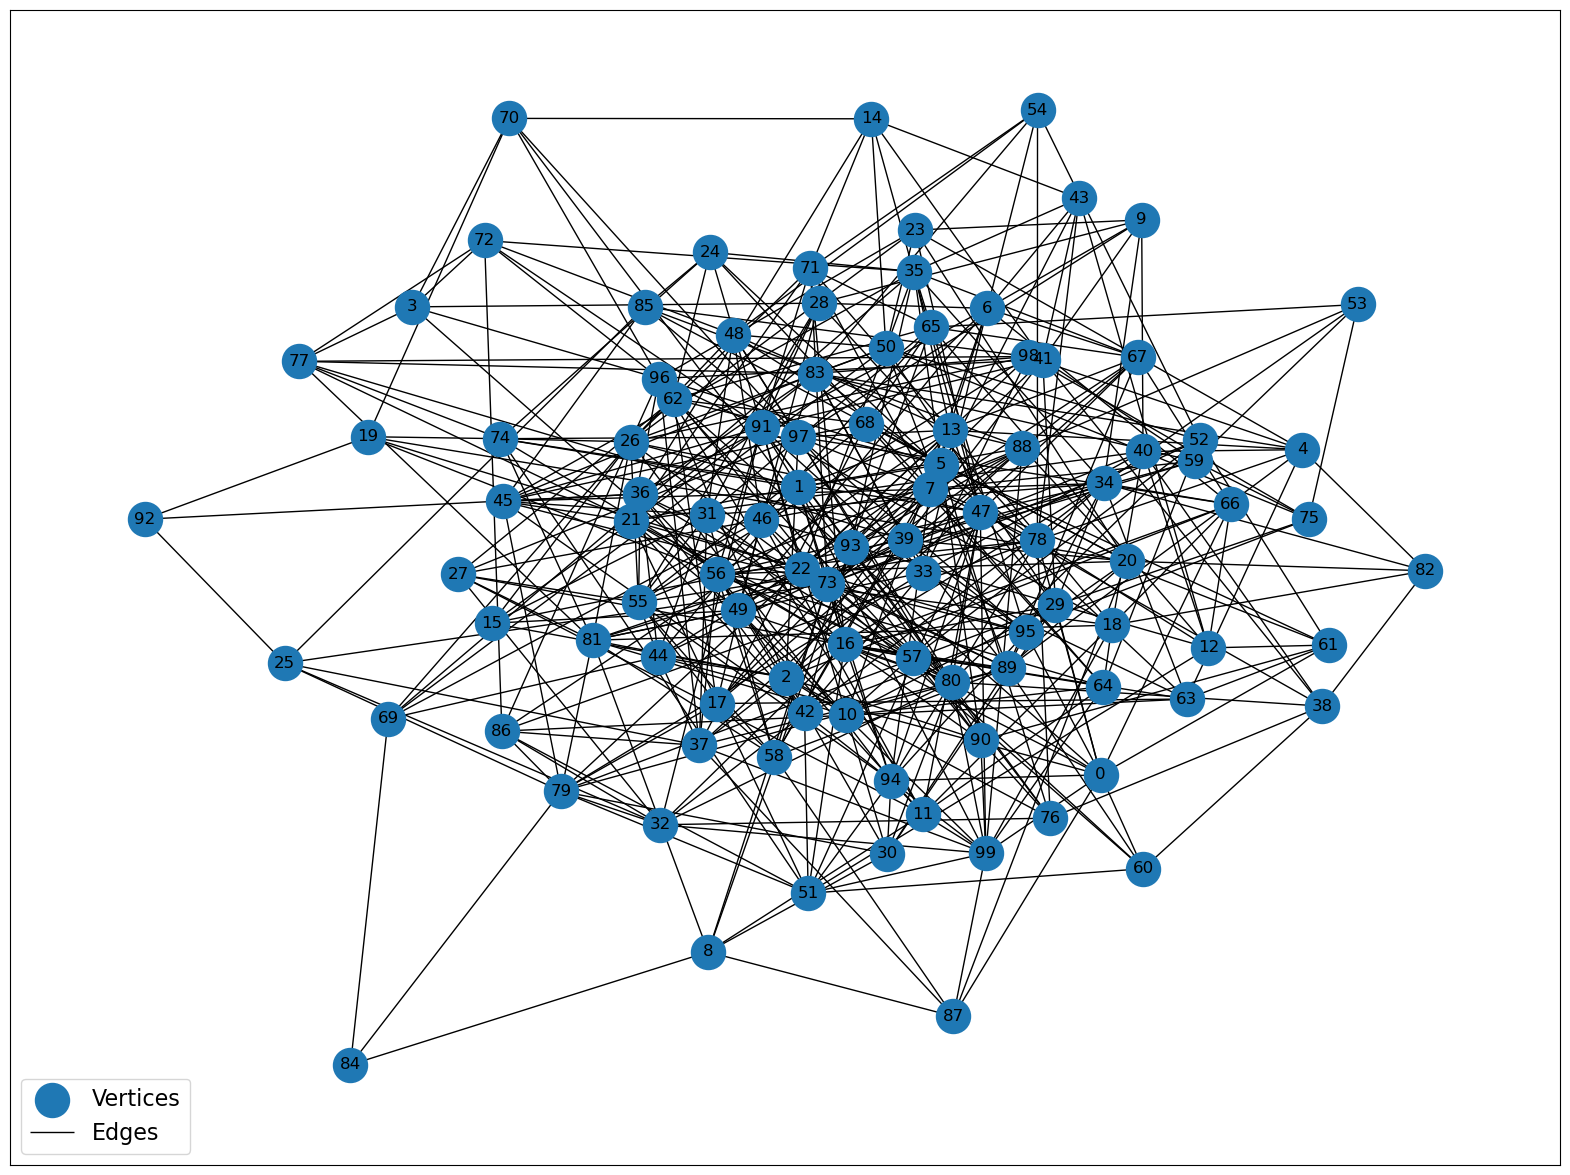

In [7]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(graph, pos=pos, node_size=600, label='Vertices')
nx.draw_networkx_edges(graph, pos=pos,  label='Edges')
nx.draw_networkx_labels(graph, pos=pos)
plt.legend(fontsize=16, loc='lower left')
plt.show()

In [8]:
# Function for generate avarage time for 10 iterations method apply
def gen_avg_time(method, g, log_show=False):
    r_source = np.random.choice(np.array(g.nodes()), 1)[0]
    time = 0
    for i in range(1,11):
        start = timer()
        dc, dp = method(g, r_source)
        end = timer()
        temp = end - start
        if log_show:
            print('{} iteration, time - {}'.format(i, temp))
        time += temp
    if log_show:
        print('Average time for 10 iterations - {}'.format(time / 10))
        print(f'{r_source} Start vertex')
    return time / 10

In [9]:
# Function for calculate difference between two method in 100 iterations
def calc_diff(g):
    avg = []
    for i in range(100):
        avg.append(abs(gen_avg_time(nx.single_source_dijkstra, g) - gen_avg_time(nx.single_source_bellman_ford, g)))
    avg_time = np.sum(avg) / 100
    print(f'Average by 100 iterations difference between methods - {avg_time}')
    return avg_time

In [10]:
gen_avg_time(nx.single_source_dijkstra, graph, log_show=True)

1 iteration, time - 0.0011848000576719642
2 iteration, time - 0.0012293999316170812
3 iteration, time - 0.0009543999331071973
4 iteration, time - 0.001093899947591126
5 iteration, time - 0.001548200030811131
6 iteration, time - 0.0009457999840378761
7 iteration, time - 0.0009138999739661813
8 iteration, time - 0.0009407999459654093
9 iteration, time - 0.0009217000333592296
10 iteration, time - 0.0009950000094249845
Average time for 10 iterations - 0.0010727899847552181
99 Start vertex


0.0010727899847552181

In [11]:
gen_avg_time(nx.single_source_bellman_ford, graph, log_show=True)

1 iteration, time - 0.0029682000167667866
2 iteration, time - 0.0028834999538958073
3 iteration, time - 0.002791399951092899
4 iteration, time - 0.002781999995931983
5 iteration, time - 0.0036826999858021736
6 iteration, time - 0.003168600029312074
7 iteration, time - 0.0029570000478997827
8 iteration, time - 0.002744500059634447
9 iteration, time - 0.002787600038573146
10 iteration, time - 0.0034844999900087714
Average time for 10 iterations - 0.003025000006891787
30 Start vertex


0.003025000006891787

In [12]:
calc_diff(graph)

Average by 100 iterations difference between methods - 0.0020071823976468297


0.0020071823976468297

Make another graph with 1000 vertices and 5000 edges. Goal is increase graph edges and vertices to increase difference between two methods

In [13]:
n = 1000
m = 5000

# generate all possible edges in the graph
edges = [(i, j) for i in range(n) for j in range(i+1, n)]

# randomly choose m unique edges
chosen_edges = set(random.sample(edges, m))

# initialize adjacency matrix with all zeros
adj_matrix = [[0]*n for _ in range(n)]

# set ones for chosen edges
for i, j in chosen_edges:
    w = np.random.randint(1, 50)
    adj_matrix[i][j] = w
    adj_matrix[j][i] = w

In [14]:
huge_am = pd.DataFrame(adj_matrix, dtype=int)
huge_am

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
np.all(am == am.T)

True

In [16]:
huge_graph = nx.from_pandas_adjacency(huge_am)

In [17]:
gen_avg_time(nx.single_source_dijkstra, huge_graph, log_show=True)

1 iteration, time - 0.01295639993622899
2 iteration, time - 0.012796099996194243
3 iteration, time - 0.013439400005154312
4 iteration, time - 0.013264200068078935
5 iteration, time - 0.011622299905866385
6 iteration, time - 0.014558500028215349
7 iteration, time - 0.013424000004306436
8 iteration, time - 0.012265200028195977
9 iteration, time - 0.012733099982142448
10 iteration, time - 0.012078800005838275
Average time for 10 iterations - 0.012913799996022135
811 Start vertex


0.012913799996022135

In [18]:
gen_avg_time(nx.single_source_bellman_ford, huge_graph, log_show=True)

1 iteration, time - 0.045911399996839464
2 iteration, time - 0.04303359996993095
3 iteration, time - 0.041488499962724745
4 iteration, time - 0.04138529999181628
5 iteration, time - 0.04558629996608943
6 iteration, time - 0.046826999983750284
7 iteration, time - 0.05945559998508543
8 iteration, time - 0.04698470002040267
9 iteration, time - 0.04093250003643334
10 iteration, time - 0.04155020008329302
Average time for 10 iterations - 0.04531550999963656
622 Start vertex


0.04531550999963656

In [19]:
t_b = timer()
diff = calc_diff(huge_graph)
t_a = timer()
print(f'{t_a - t_b} - Seconds required to calculate this function')

Average by 100 iterations difference between methods - 0.03186308769974858
57.81090709997807 - Seconds required to calculate this function


## Second part

In [750]:
r = 10
c = 20

In [751]:
positions = {}
for i in range(r):
    for j in range(c):
        positions[(i, j)] = [j, i]

In [752]:
G = nx.grid_2d_graph([i for i in range(r)], [i for i in range(c)])

In [753]:
diagonal_edges_lr = []
for i in range(r-1, 0, -1):
    for j in range(c):
        if j != 19:
            diagonal_edges_lr.append(((i, j), (i-1, j+1)))

In [754]:
diagonal_edges_rl = []
for i in range(r-1, 0, -1):
    for j in range(c):
        if j != 0:
            diagonal_edges_lr.append(((i, j), (i-1, j-1)))

In [755]:
G.add_edges_from(diagonal_edges_lr)
G.add_edges_from(diagonal_edges_rl)

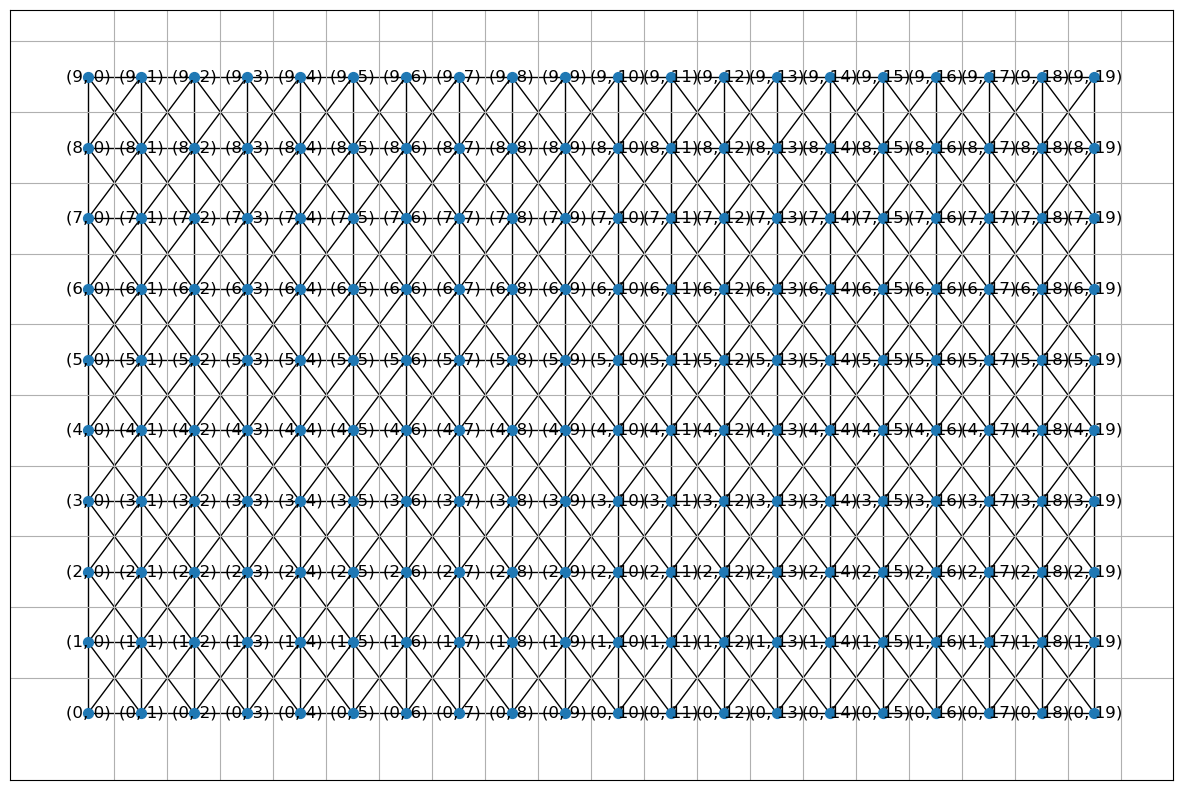

In [756]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticks(np.arange(0.5, 20.5, 1))
ax.set_yticks(np.arange(0.5, 10.5, 1))
ax.margins(x=0.025, y=0.05)
ax.grid()
nx.draw_networkx(G, pos=positions, node_size=50, ax=ax, with_labels=True)

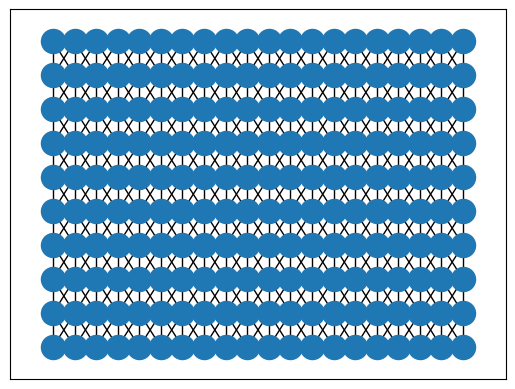

In [757]:
nx.draw_networkx(G, pos=positions, with_labels=False)

In [758]:
points_for_obstacles = []
while len(points_for_obstacles) < 40:
    point = (np.random.randint(low=1, high=r-1), np.random.randint(low=1, high=c-1))
    if len(points_for_obstacles) != 0:
        if point not in points_for_obstacles:
            points_for_obstacles.append(point)
        else:
            continue
    else:
        points_for_obstacles.append(point)

In [759]:
len(points_for_obstacles)

40

In [760]:
# Find "bad" nodes
bad_nodes = []
for i in points_for_obstacles:
    if (i[0]+1, i[1]+1) in points_for_obstacles:
        bad_nodes.append(((i[0], i[1]+1), (i[0]+1, i[1])))
    if (i[0]-1, i[1]+1) in points_for_obstacles:
        bad_nodes.append(((i[0]-1, i[1]), (i[0], i[1]+1)))

In [761]:
for i in points_for_obstacles:
    G.remove_node(i)

In [762]:
for i in bad_nodes:
    if i[0] in G.nodes() and i[1] in G.nodes() and i in G.edges():
        G.remove_edge(i[0], i[1])

In [763]:
graph_with_obstacles = G.copy()

In [764]:
x = [i[1] for i in points_for_obstacles]
y = [i[0] for i in points_for_obstacles]

In [765]:
data = []
for i in range(r):
    temp = []
    for j in range(c):
        if (i, j) in points_for_obstacles:
            temp.append(1)
        else:
            temp.append(0)
    data.append(temp)
    temp = []

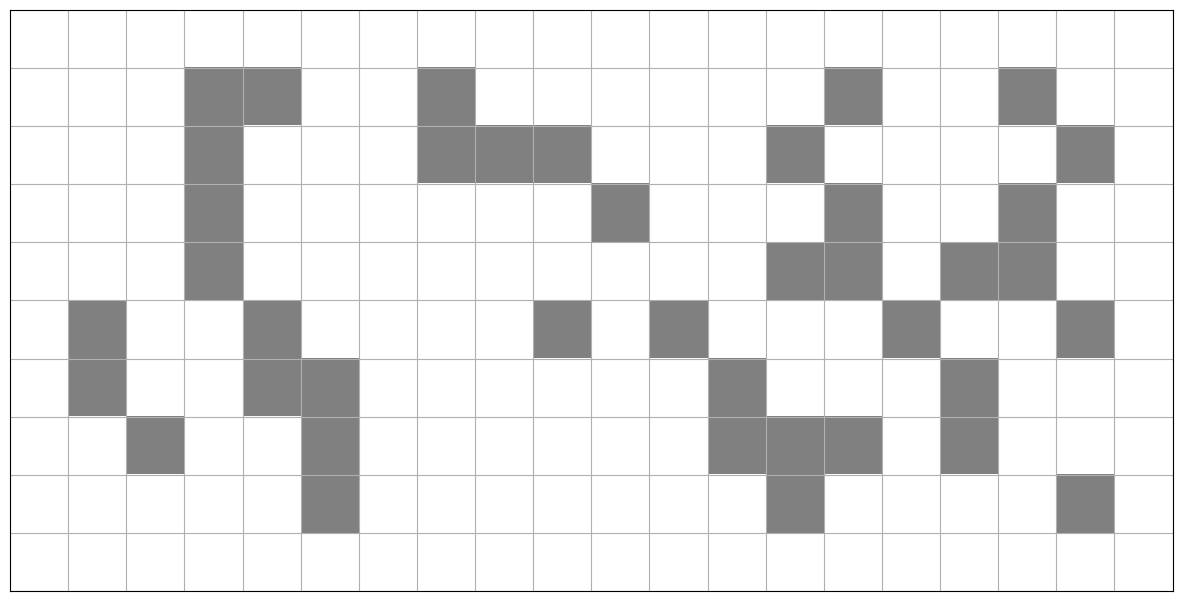

In [766]:
cmap = colors.ListedColormap(['white', 'gray'])
bounds = [0, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticks(np.arange(0.5, 20.5, 1))
ax.set_yticks(np.arange(0.5, 10.5, 1))
ax.margins(x=0.025, y=0.05)
ax.grid()
ax.imshow(data, cmap=cmap, norm=norm)
nx.draw_networkx_nodes(graph_with_obstacles, pos=positions, node_size=50, ax=ax, node_color='white')

In [777]:
number_of_paths = 5

In [778]:
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [779]:
rng = np.random.default_rng()
nx.set_edge_attributes(graph_with_obstacles, {e: e[1][0] * 2 for e in G.edges()}, "cost")
paths = []
for i in range(number_of_paths):
    r_points = rng.choice(graph_with_obstacles.nodes(), 2)
    paths.append(nx.astar_path(G, (r_points[0][0], r_points[0][1]),(r_points[1][0], r_points[1][1]), heuristic=dist, weight="cost"))

In [780]:
edges_list = {}
path_count = 0
for i in paths:
    temp = []
    for j in range(len(i) - 1):
        temp.append((i[j], i[j+1]))
    edges_list[path_count] = temp
    path_count += 1
    temp = []

In [828]:
def plot_a_path(path_number):
    cmap = colors.ListedColormap(['white', 'gray'])
    bounds = [0, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xticks(np.arange(0.5, 20.5, 1))
    ax.set_yticks(np.arange(0.5, 10.5, 1))
    ax.margins(x=0.0025, y=0.05)
    ax.grid()
    ax.imshow(data, cmap=cmap, norm=norm)
    nx.draw_networkx_nodes(graph_with_obstacles, pos=positions, node_size=100, ax=ax, node_color='orange', nodelist=paths[path_number])
    nx.draw_networkx_edges(graph_with_obstacles, pos=positions, edgelist=edges_list[path_number], edge_color='orange', label='Shortest path')
    ax.set_title('Shortest path by A star algorithm')
    ax.legend(loc='upper center', bbox_to_anchor=(0.9, -0.005), fancybox=True, shadow=True, ncol=5)

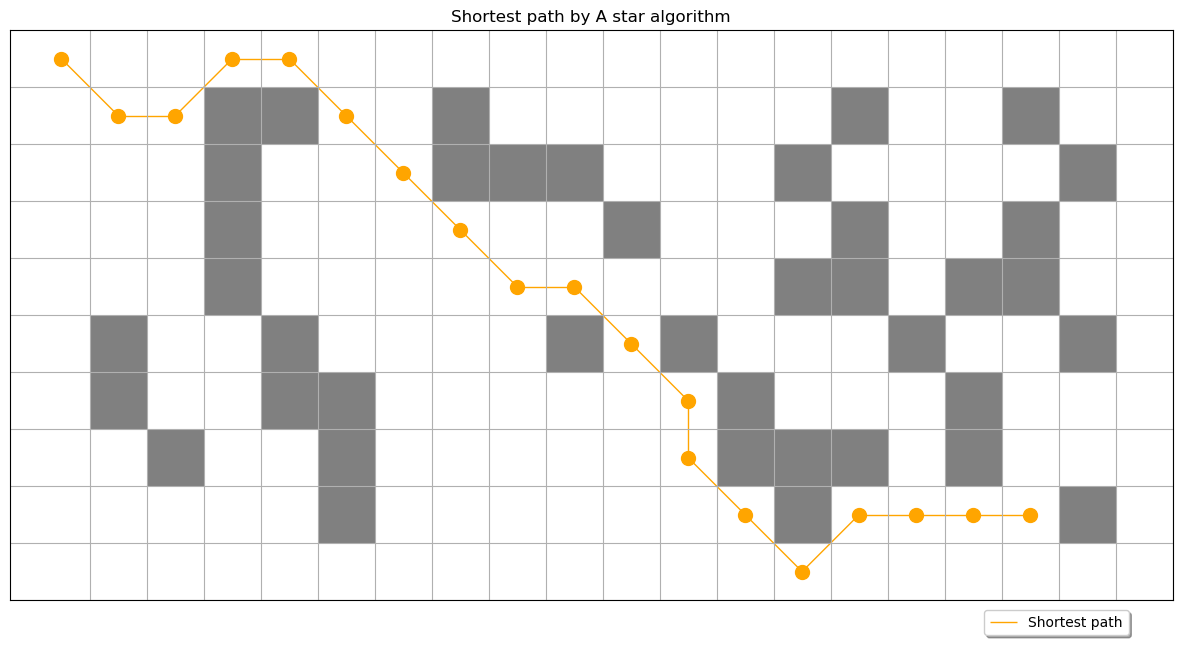

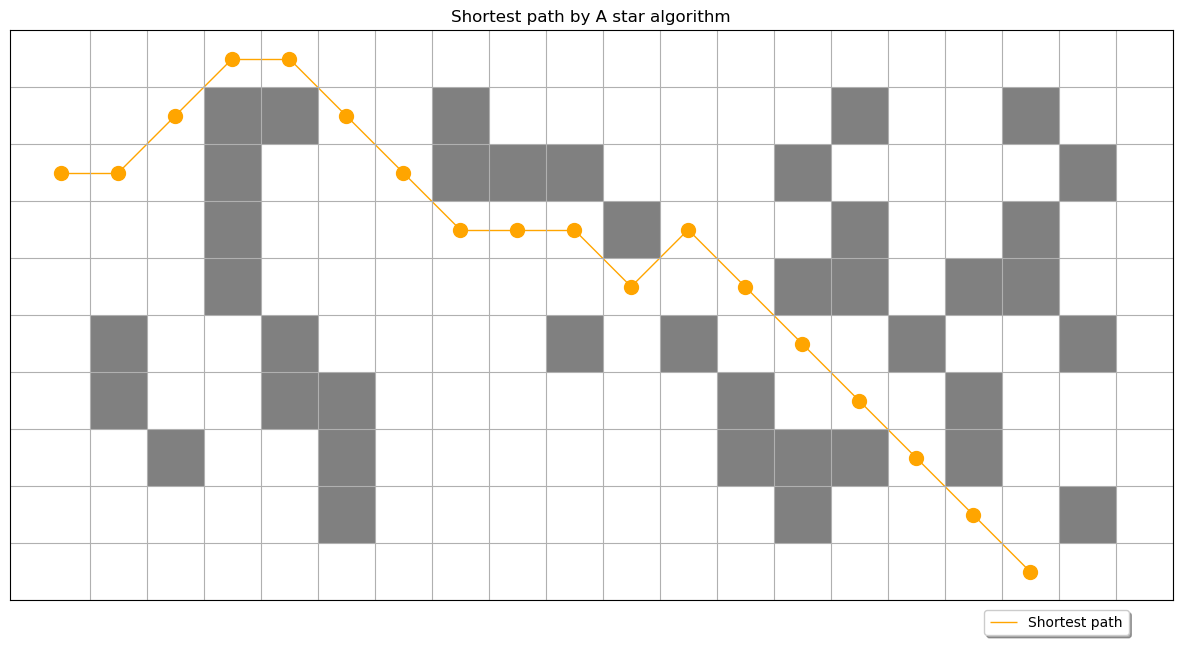

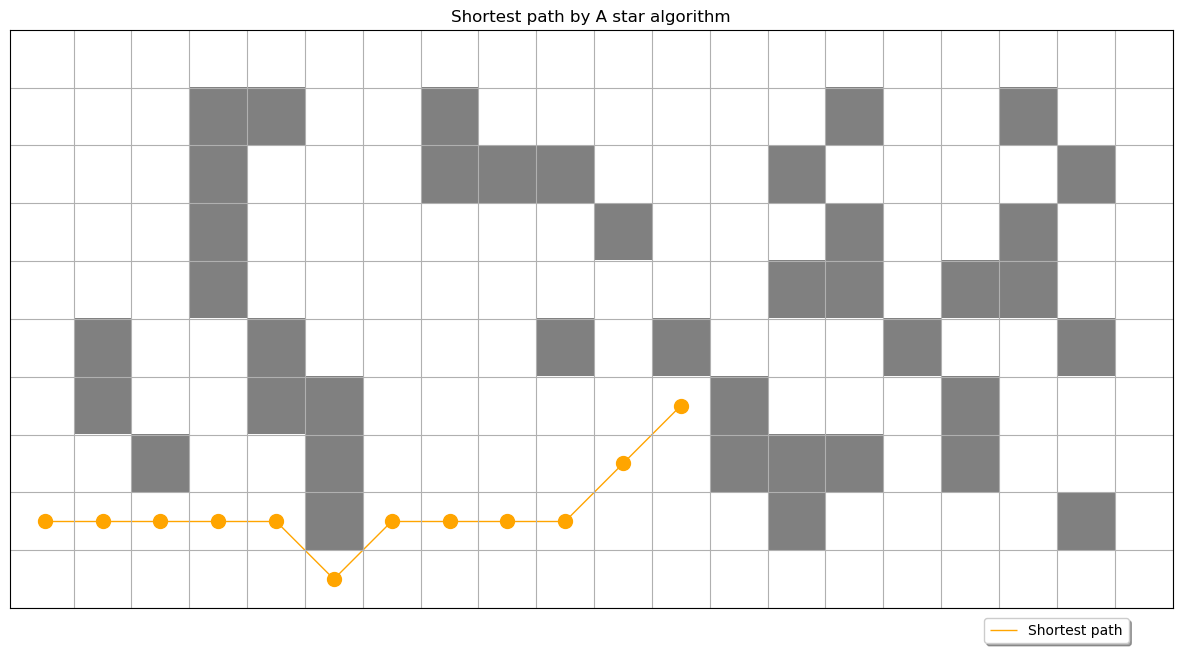

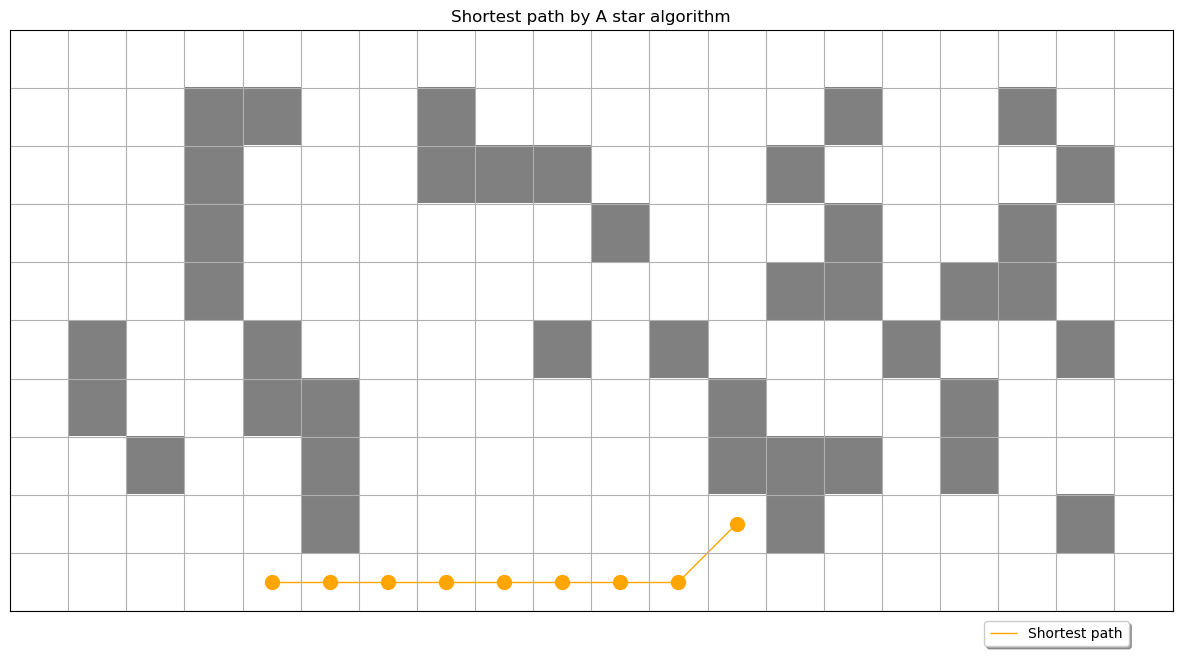

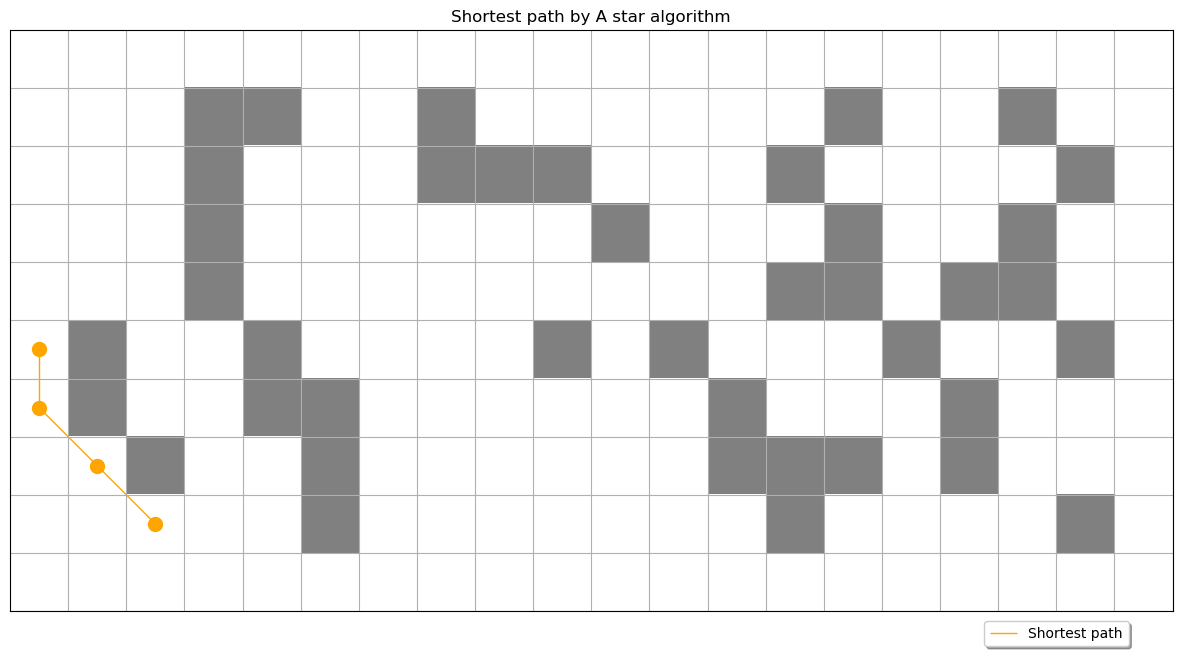

In [829]:
for i in range(number_of_paths):
    plot_a_path(i)